# CurveFit     

Various (nonlinear) curve fitting methods needed at various times for the rloop capsule

cf. [`capsulecorplab`'s github repository on `CurveFit`](https://github.com/capsulecorplab/CurveFit)

In [6]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [25]:
from scipy.stats import gamma # for drag vs. v fit

In [10]:
SUBDIR = './rawdata/' # subdirectory with all data

#### Starting example from [`www.walkingrandomly.com`](# http://www.walkingrandomly.com/images/python/least_squares/Python_nonlinear_least_squares.pdf)

[`capsulecorplab`](https://github.com/capsulecorplab) started with this blog post on [Simple nonlinear least squares curve fitting in Python](http://www.walkingrandomly.com/?p=5215), which used this example (*only an example*) for the fitting function:   

$$
F(p_1,p_2,x)=p_1\cos{(p_2x)} +p_2 \sin{(p_1x)}  
$$  

cf. [`CurveFit/example_BestFit.py`](https://github.com/capsulecorplab/CurveFit/blob/master/example_BestFit.py)

In [3]:
xdata = np.array([-2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9])
ydata = np.array([0.699369,0.700462,0.695354,1.03905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001])

In [4]:
# define fit function
def func(x, p1,p2):
    return p1*np.cos(p2*x) + p2*np.sin(p1*x)

In [5]:
# Calculate and show fit parameters. Use a starting guess of p1=1 and p2=0.2
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))

In [7]:
# Calculate and show sum of squares of residuals since it’s not given by the curve_fit function
p1 = popt[0]
p2 = popt[1]

residuals = ydata - func(xdata,p1,p2)
fres = sum(residuals**2)

In [8]:
print 'popt', popt
print 'pcov', pcov
print 'p1', p1
print 'p2', p2
print 'residuals', residuals
print 'fres', fres

popt [ 1.88185099  0.70022986]
pcov [[  7.52408290e-04   1.00812823e-04]
 [  1.00812823e-04   8.37695698e-05]]
p1 1.881850994
p2 0.700229857403
residuals [-0.02769065 -0.0322945  -0.0102489   0.05662436  0.09203901  0.09763049
  0.1140355   0.10933381  0.02871569 -0.07004408]
fres 0.0538126964188


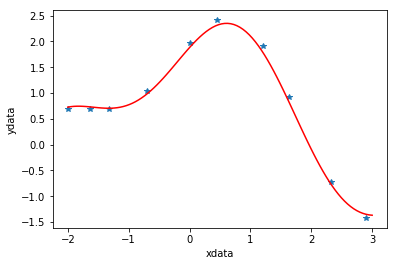

In [9]:
# Plot fitted curve along with data
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata')

plt.show()

#### Applying this particular curvefit to ski data    

cf. [`CurveFit/nonlinearFit.py`](https://github.com/capsulecorplab/CurveFit/blob/master/nonlinearFit.py)

In [12]:
# Read csv and save to a pandas data frame
df = pd.read_csv(SUBDIR+'data.csv')

In [15]:
print( df.describe() )
df.head()

       Unnamed: 0         drag          lift  Force2.Force_y          h  \
count   70.000000    70.000000     70.000000       70.000000  70.000000   
mean    96.857143  2302.593430   1384.142781    -2282.303038   0.012400   
std    115.732611  2758.891065   2719.441488     3018.344824   0.010989   
min     16.000000     1.312715  -1208.633695   -11175.314369   0.002000   
25%     28.000000   108.472943     -1.749933    -4063.892540   0.004000   
50%     48.000000   879.314513    146.804587     -502.773080   0.008000   
75%    115.000000  4272.365524   1910.715384      -29.166598   0.016000   
max    425.000000  8697.564181  11217.223569      711.303141   0.032000   

                v  
count   70.000000  
mean    29.242857  
std     42.548416  
min      0.100000  
25%      4.000000  
50%     11.500000  
75%     30.000000  
max    150.000000  


,Unnamed: 0,drag,lift,Force2.Force_y,h,v
0,16,212.182071,-854.307696,711.303141,0.002,0.1
1,16,135.148203,-548.182782,453.954050,0.004,0.1
2,16,56.376321,-225.854748,181.815611,0.008,0.1
3,16,9.859787,-36.330422,26.066436,0.016,0.1
4,16,1.312715,-1.262546,-4.156777,0.032,0.1


In [17]:
h = 0.002	# use for data.csv

ydata = np.array(df.drag[df.h == h])
xdata = np.array(df.v[df.h == h])

In [18]:
# Calculate and show fit parameters. Use a starting guess of p1=1 and p2=0.2
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

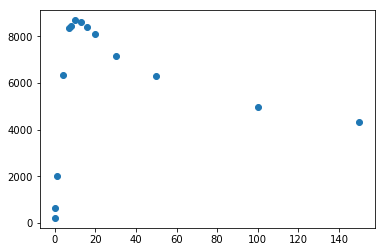

In [23]:
plt.scatter(xdata, ydata)

Taking a look at the plot of drag vs. $v$, the form $p_1 \cos{(p_2 x)} + p_2 \sin{(p_1 x) }$ isn't appropriate since the coefficients in front of the sinusoidal terms $\cos$, $\sin$ are dependent upon the "wavenumbers" $p_2,p_1$.   

Instead, consider a gamma function distribution   

$$  
f(x,k,\theta) = A_0 x^k \exp{ (-\frac{x}{\theta }) }  
$$ 
with $x,k,\theta \in \mathbb{R}$, and $A_0 \in \mathbb{R}$ constant.  

In [110]:
#def gamma_func_fit(x, k, theta, x_0, A_0 ):
#    return A_0 * x**2 * np.exp( -((x-x_0)**2/theta) )
#def gamma_func_fit(x, k, theta, x_0, A_0 ):
#    return A_0 * x**k * np.exp( -((x-x_0)**2/theta) )
def gamma_func_fit(x, k, theta, x_0  ):
    return x**k * np.exp( -((x-x_0)/theta) )


In [111]:
# Calculate and show fit parameters. Use a starting guess of p1=1 and p2=0.2
popt, pcov = curve_fit(gamma_func_fit, xdata, ydata , maxfev=10000000)

In [112]:
popt

array([  4.09027753e-01,   6.29072284e+01,   5.13311913e+02])

In [113]:
pcov

array([[  8.11265790e-03,  -1.01711747e+00,  -9.31387568e+00],
       [ -1.01711747e+00,   2.07623166e+02,   1.79218413e+03],
       [ -9.31387568e+00,   1.79218413e+03,   1.55730444e+04]])

/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in power


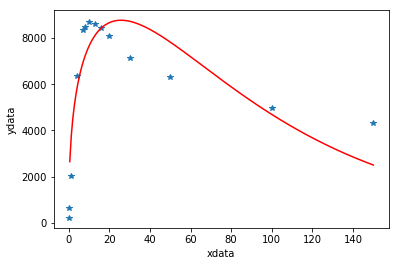

In [114]:
# Plot fitted curve along with data
curvex=np.linspace(-1,150,200)
#curvey=gamma_func_fit(curvex,popt[0],popt[1],popt[2]  )
curvey=gamma_func_fit(curvex, *popt  )

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata')

plt.show()

Function form:    

$$  
f(x; k, \beta, \theta) = (\frac{x}{ \theta } )^k \exp{ \left( - \left( \frac{x}{\theta} \right)^{\beta} \right) }   
$$

In [160]:
def gamma_func_fit(x, k, theta, beta  ):
    return (x/theta)**k * np.exp( - (x/theta)**beta )

In [161]:
# Calculate and show fit parameters. Use a starting guess of p1=1 and p2=0.2
popt, pcov = curve_fit(gamma_func_fit, xdata[3:], ydata[3:] , maxfev=100000)
print(popt)
print(pcov)

[  1.36856811e+00   4.53689201e-05   1.67111828e-01]
[[  1.42227281e-02   6.40345599e-06   1.72314033e-03]
 [  6.40345599e-06   2.90382561e-09   7.76176802e-07]
 [  1.72314033e-03   7.76176802e-07   2.08803685e-04]]


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


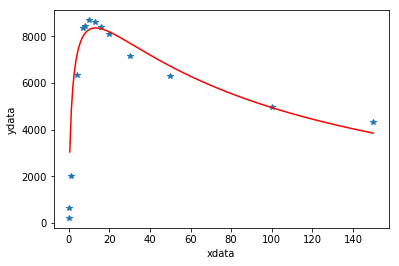

In [162]:
# Plot fitted curve along with data
curvex=np.linspace(-1,150,200)
curvey=gamma_func_fit(curvex, *popt  )

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata')

plt.show()

So for 

## drag vs. $v$    

#### $h=0.002 m$

In [170]:
h = 0.002	# use for data.csv

ydata = np.array(df.drag[df.h == h])
xdata = np.array(df.v[df.h == h])

In [179]:
def gamma_func_fit(x, k, theta, beta   ):
    return (x/theta)**k  *  np.exp( - (x/theta)**beta )

In [180]:
# Calculate and show fit parameters. 
popt, pcov = curve_fit(gamma_func_fit, xdata[3:], ydata[3:] , maxfev=100000)
print(popt)
print(pcov)

[  1.36856811e+00   4.53689201e-05   1.67111828e-01]
[[  1.42227281e-02   6.40345599e-06   1.72314033e-03]
 [  6.40345599e-06   2.90382561e-09   7.76176802e-07]
 [  1.72314033e-03   7.76176802e-07   2.08803685e-04]]


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


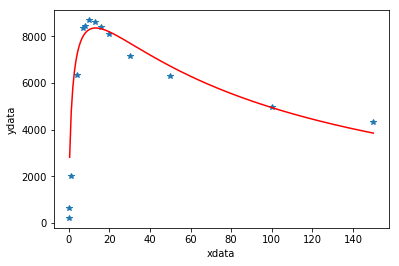

In [181]:
# Plot fitted curve along with data
curvex=np.linspace(-5,150,200)
curvey=gamma_func_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('xdata')
plt.ylabel('ydata')

plt.show()

#### $h=0.016 m$

In [187]:
h = .016 # data.csv, in meters (m) (EY : ???)

ydata = np.array(df.drag[df.h == h])
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

14
14


In [190]:
# Calculate and show fit parameters. 
popt, pcov = curve_fit(gamma_func_fit, xdata[3:], ydata[3:] , maxfev=100000)
print(popt)
print(pcov)

[  1.21097878e+00   3.37577408e-04   1.81237209e-01]
[[  1.44972521e-02   4.70596704e-05   2.15129431e-03]
 [  4.70596704e-05   1.54348274e-07   6.98982924e-06]
 [  2.15129431e-03   6.98982924e-06   3.19342255e-04]]


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


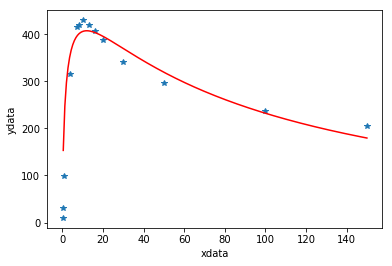

In [191]:
# Plot fitted curve along with data
curvex=np.linspace(-5,150,200)
curvey=gamma_func_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('xdata')
plt.ylabel('ydata')

plt.show()

#### $h=0.032 m$

In [192]:
h = .032 # data.csv, in meters (m) (EY : ???)

ydata = np.array(df.drag[df.h == h])
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

14
14


In [202]:
# Calculate and show fit parameters. 
popt, pcov = curve_fit(gamma_func_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[ 1.20186783  0.01646837  0.24127158]
[[ 0.01882448  0.00182851  0.00367822]
 [ 0.00182851  0.00018639  0.00035906]
 [ 0.00367822  0.00035906  0.00072042]]


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


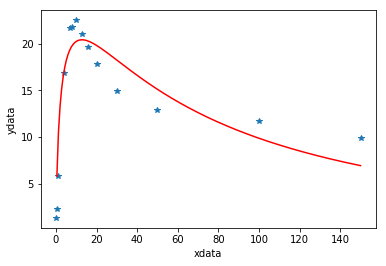

In [203]:
# Plot fitted curve along with data
curvex=np.linspace(-5,150,200)
curvey=gamma_func_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('xdata')
plt.ylabel('ydata')

plt.show()

### $h=0.014 m$

In [326]:
h = .014 # data.csv, in meters (m) (EY : ???)

ydata = np.array(df.drag[df.h == h])
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

0
0


So there's no data for $h= 0.014 m$.  Same with $h=0.018 m$

In [327]:
h = .018 # data.csv, in meters (m) (EY : ???)

ydata = np.array(df.drag[df.h == h])
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

0
0


### lift vs. $v$  

$$    
y=y(x) = A+ B\log{ (x/C) }   
$$

In [219]:
def log_func_fit(x, A, B, C  ):
    return A+B*np.log( x + C)

#### $h=0.002 m  $

In [220]:
h = .002 # data.csv, in meters (m) (EY : ???)

ydata = np.array(df.lift[df.h == h])
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

14
14


In [223]:
# Calculate and show fit parameters. 
popt, pcov = curve_fit(log_func_fit, xdata[3:], ydata[3:] , maxfev=100000)
print(popt)
print(pcov)

[ -4.97893534e+03   3.40295757e+03  -1.24862349e+00]
[[  1.69869627e+06  -4.17670165e+05  -1.35296000e+03]
 [ -4.17670165e+05   1.07875349e+05   3.18224518e+02]
 [ -1.35296000e+03   3.18224518e+02   1.30112239e+00]]


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


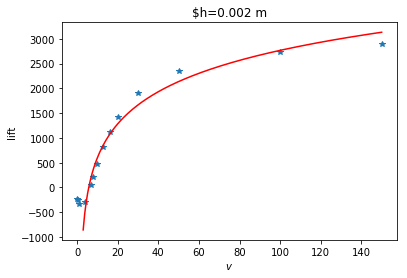

In [230]:
# Plot fitted curve along with data
curvex=np.linspace(3,150,200)
curvey=log_func_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$v$')
plt.ylabel('lift')
plt.title('$h=0.002 m')
plt.show()

#### $h = 0.008 m $  

In [231]:
h = .008 # data.csv, in meters (m) (EY : ???)

ydata = np.array(df.lift[df.h == h])
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

14
14


In [232]:
# Calculate and show fit parameters. 
popt, pcov = curve_fit(log_func_fit, xdata[3:], ydata[3:] , maxfev=100000)
print(popt)
print(pcov)

[ -1.32771476e+03   8.91665739e+02  -1.30426033e+00]
[[  1.27207084e+05  -3.13498349e+04  -3.81139913e+02]
 [ -3.13498349e+04   8.12188241e+03   8.98390417e+01]
 [ -3.81139913e+02   8.98390417e+01   1.38267961e+00]]


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


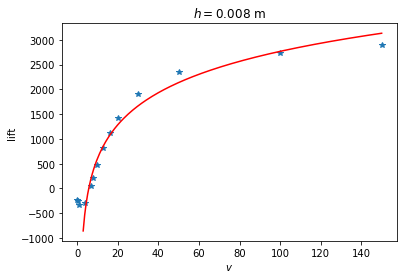

In [234]:
# Plot fitted curve along with data
curvex=np.linspace(3,150,200)
curvey=log_func_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$v$')
plt.ylabel('lift')
plt.title('$h=0.008$ m')


plt.show()

### `Force2.Force_y` vs. $v$

Fitting form, *exponential function*:     

$$    
f(x; \lambda,k) =  A \exp{ ( - C (x -B)  )} + D         
$$  

In [289]:
def exp_fit(x, A,B,C,D   ):
    return A * np.exp(- C * (x-B)) + D 

#### $h=0.002 \, m$

In [264]:
df.columns

Index([u'Unnamed: 0', u'drag', u'lift', u'Force2.Force_y', u'h', u'v'], dtype='object')

In [272]:
h = .002 # data.csv, in meters (m) (EY : ???)

ydata = np.array( df.ix[df.h==h]["Force2.Force_y"] )
xdata = np.array(df.v[df.h == h])
print (len(ydata)); print(len(xdata))

14
14


In [323]:
# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[3:], ydata[3:] , p0=[100,100,1,1],maxfev=1000000)
print(popt)
print(pcov)

[  1.48989159e+02   6.34241656e+01   6.31899117e-02  -1.03241932e+04]
[[  3.78338585e+17  -4.00782718e+16  -1.08340854e+06  -4.13065726e+10]
 [ -4.00782718e+16   4.24558301e+15   1.14767716e+05   4.37569516e+09]
 [ -1.08340915e+06   1.14767780e+05   2.49656128e-04   4.54655561e+00]
 [ -4.13065825e+10   4.37569621e+09   4.54655557e+00   2.10248730e+05]]


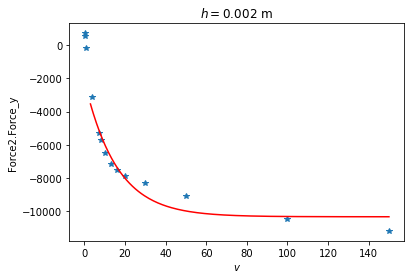

In [324]:
# Plot fitted curve along with data
curvex=np.linspace(3,150,200)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$v$')
plt.ylabel('Force2.Force_y')
plt.title('$h=0.002$ m')


plt.show()

Some remarks:    

* Trying different initial conditions for `curve_fit` helps to find the parameters; wrong choice of initial conditions lead to `RunTime Errors` since number of iterations run out before residuals shrink enough  
* I determined the fitting forms by the following manner:  
    - I use only combinations and factors of *transcendental, polynomial, exponential, and logarithmic* functions, because physical systems should only exhibit such functions  
    - Take a look *manually* at what the desired fit shape would be and search for what combination of transcendentals, polynomials, exponentials, and logarithms, would give us such as shape  
    - modify accordingly  

In [329]:
## [`example_ski_data.csv`](https://github.com/capsulecorplab/CurveFit/blob/master/example_ski_data.csv)  

In [330]:
# Read csv and save to a pandas data frame
df = pd.read_csv(SUBDIR+'example_ski_data.csv')

In [332]:
df.describe()

,v,h,drag,lift
count,15.000000,15.000000,15.000000,15.000000
mean,102.666667,8.533333,232.933333,1152.866667
std,107.667920,12.052662,137.027873,387.425360
min,10.000000,2.000000,77.000000,462.000000
25%,30.000000,3.000000,151.000000,852.500000
50%,50.000000,5.000000,196.000000,1166.000000
75%,100.000000,8.000000,278.000000,1465.000000
max,300.000000,50.000000,501.000000,1645.000000


There may not be enough data points to make any sense.  The functional relationship is not clear.  

*But* the desired outputs are **lift** and **drag**.  

## On `Data Table 1 A57.csv` and `XY Plot 1 A57.csv`     

In [338]:
DF1_A57 = pd.read_csv( SUBDIR + "Data Table 1 A57.csv" )
XY1_A57 = pd.read_csv( SUBDIR + "XY Plot 1 A57.csv" )

In [340]:
print( DF1_A57.head() )
print( DF1_A57.describe() )
print( XY1_A57.head() )
XY1_A57.describe() 

   Time [ms]  Force1.Force_x [newton]  Force1.Force_y [newton]  \
0          0               -10.946411              3516.257762   
1         20                20.788547              3468.349537   
2         40                 0.738610              3401.388092   
3         60                 5.105571              3396.862314   
4         80               -15.205590              3364.087479   

   Force1.Force_z [newton]  
0               246.526052  
1               147.149761  
2               115.293730  
3                93.400955  
4                70.793983  
        Time [ms]  Force1.Force_x [newton]  Force1.Force_y [newton]  \
count   26.000000                26.000000                26.000000   
mean   250.000000               -22.610773              3348.171358   
std    152.970585                17.583832                50.770583   
min      0.000000               -53.791776              3295.018801   
25%    125.000000               -34.899801              3320.086694   
50%

,Time [ms],Force1.Force_y [kNewton],Force1.Force_z [kNewton],Force1.Force_x [kNewton]
count,26.000000,26.000000,26.000000,26.000000
mean,250.000000,3.348171,0.032110,-0.022611
std,152.970585,0.050771,0.060647,0.017584
min,0.000000,3.295019,-0.024392,-0.053792
25%,125.000000,3.320087,-0.001277,-0.034900
50%,250.000000,3.331467,0.010034,-0.022572
75%,375.000000,3.358157,0.040602,-0.012748
max,500.000000,3.516258,0.246526,0.020789


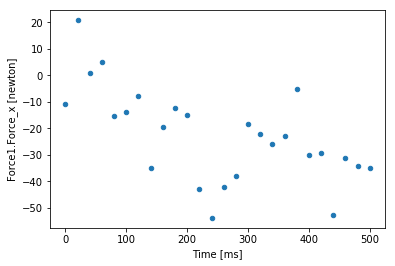

In [342]:
DF1_A57.plot("Time [ms]", "Force1.Force_x [newton]", kind="scatter", title="Data Table 1")

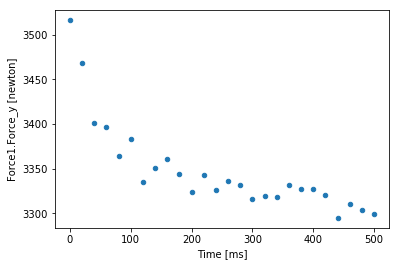

In [343]:
DF1_A57.plot("Time [ms]", "Force1.Force_y [newton]", kind="scatter", title="Data Table 1")

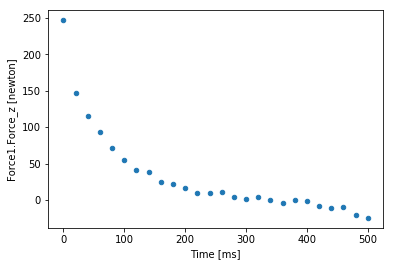

In [344]:
DF1_A57.plot("Time [ms]", "Force1.Force_z [newton]", kind="scatter", title="Data Table 1")

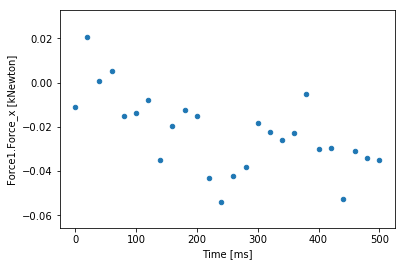

In [347]:
XY1_A57.plot("Time [ms]", "Force1.Force_x [kNewton]", kind="scatter", title="XY 1")

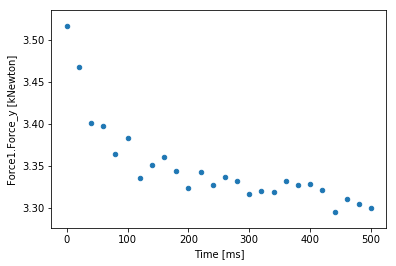

In [349]:
XY1_A57.plot("Time [ms]", "Force1.Force_y [kNewton]", kind="scatter", title="XY 1")

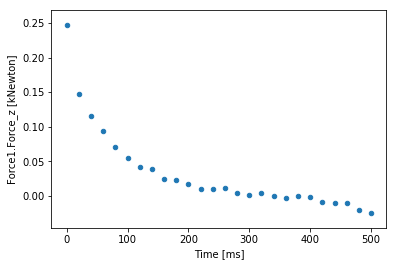

In [350]:
XY1_A57.plot("Time [ms]", "Force1.Force_z [kNewton]", kind="scatter" , title="XY 1")

### Fit with decaying exponentials

In [355]:
xdata = np.array( DF1_A57["Time [ms]"] )
ydata = np.array( DF1_A57["Force1.Force_x [newton]"] )

# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[0:], ydata[0:] , p0=[100,100,1,-25.],maxfev=1000000)
#popt, pcov = curve_fit( exp_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[  3.55959076e+01   2.47183792e+01   7.56776194e-03  -3.41334118e+01]
[[  1.37576287e+16  -5.11812921e+16  -7.73022775e+04   6.54586774e+07]
 [ -5.11812921e+16   1.90405244e+17   2.87580778e+05  -2.43520298e+08]
 [ -7.73022763e+04   2.87580775e+05   2.16370710e-05   2.62754319e-02]
 [  6.54586787e+07  -2.43520303e+08   2.62754319e-02   4.79476035e+01]]


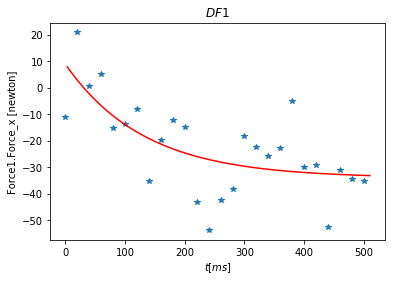

In [356]:
# Plot fitted curve along with data
curvex=np.linspace(3,510,1000)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$t [ms]$')
plt.ylabel('Force1.Force_x [newton]')
plt.title('$DF1$ ')

plt.show()

In [357]:
xdata = np.array( DF1_A57["Time [ms]"] )
ydata = np.array( DF1_A57["Force1.Force_y [newton]"] )

# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[0:], ydata[0:] , p0=[100,100,1,-25.],maxfev=1000000)
#popt, pcov = curve_fit( exp_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[  9.83442122e+01   4.59986299e+01   1.42182756e-02   3.31879780e+03]
[[  2.15690227e+14  -1.54495024e+14  -4.19716783e+03  -3.60536323e+04]
 [ -1.54495024e+14   1.10662002e+14   3.00634836e+03   2.58074981e+04]
 [ -4.19716783e+03   3.00634836e+03   3.26164528e-06   4.41157372e-03]
 [ -3.60535988e+04   2.58074758e+04   4.41157372e-03   1.66801247e+01]]


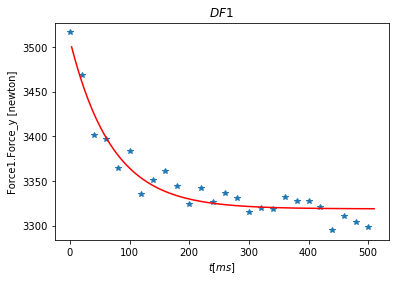

In [358]:
# Plot fitted curve along with data
curvex=np.linspace(3,510,1000)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$t [ms]$')
plt.ylabel('Force1.Force_y [newton]')
plt.title('$DF1$ ')

plt.show()

In [364]:
xdata = np.array( DF1_A57["Time [ms]"] )
ydata = np.array( DF1_A57["Force1.Force_z [newton]"] )

# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[0:], ydata[0:] , p0=[1000,100,1,-25.],maxfev=1000000)
#popt, pcov = curve_fit( exp_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[  1.21177361e+02   4.66284485e+01   1.36915919e-02  -4.70124638e+00]
[[ -1.50276606e+17   9.06417285e+16   5.93535778e+04  -5.35088501e+07]
 [  9.06417285e+16  -5.46720022e+16  -3.58000453e+04   3.22747072e+07]
 [  5.93535708e+04  -3.58000541e+04   1.03996765e-06   1.96508866e-03]
 [ -5.35088332e+07   3.22746970e+07   1.96508866e-03   9.23283065e+00]]


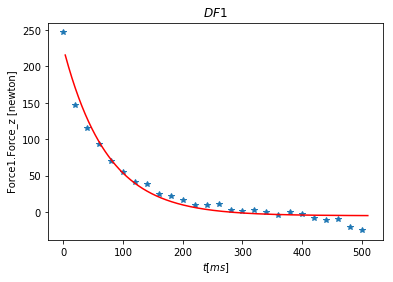

In [365]:
# Plot fitted curve along with data
curvex=np.linspace(3,510,1000)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$t [ms]$')
plt.ylabel('Force1.Force_z [newton]')
plt.title('$DF1$ ')

plt.show()

In [371]:
xdata = np.array( XY1_A57["Time [ms]"] )
ydata = np.array( XY1_A57["Force1.Force_x [kNewton]"] )

# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[0:], ydata[0:] , p0=[100,100,1,-25.],maxfev=1000000)
#popt, pcov = curve_fit( exp_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[  3.49713532e-02   2.70577913e+01   7.56767646e-03  -3.41335192e-02]
[[  1.88060923e+10  -7.11907341e+13   3.29767954e+02   4.17481711e+02]
 [ -7.11907341e+13   2.69493552e+17  -1.24834142e+06  -1.58038322e+06]
 [  3.29767947e+02  -1.24834140e+06   2.69853970e-05   3.39625350e-05]
 [  4.17481700e+02  -1.58038317e+06   3.39625350e-05   5.69000543e-05]]


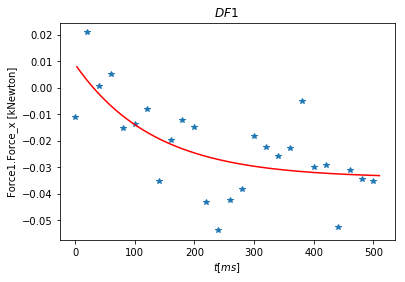

In [372]:
# Plot fitted curve along with data
curvex=np.linspace(3,510,1000)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$t [ms]$')
plt.ylabel('Force1.Force_x [kNewton]')
plt.title('$DF1$ ')

plt.show()

In [373]:
xdata = np.array( XY1_A57["Time [ms]"] )
ydata = np.array( XY1_A57["Force1.Force_y [kNewton]"] )

# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[0:], ydata[0:] , p0=[100,100,1,-25.],maxfev=1000000)
#popt, pcov = curve_fit( exp_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[  8.39104688e-02   5.71640312e+01   1.42175162e-02   3.31879675e+00]
[[  3.90449405e+08  -3.27284048e+11  -6.67542716e+00  -7.72726891e+00]
 [ -3.27284048e+11   2.74337332e+14   5.59549318e+03   6.47716148e+03]
 [ -6.67542715e+00   5.59549320e+03   3.29392096e-06   4.54300778e-06]
 [ -7.72726892e+00   6.47716149e+03   4.54300778e-06   1.68335710e-05]]


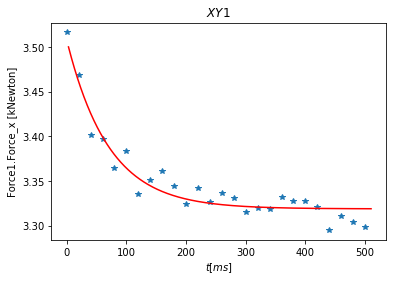

In [374]:
# Plot fitted curve along with data
curvex=np.linspace(3,510,1000)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$t [ms]$')
plt.ylabel('Force1.Force_x [kNewton]')
plt.title('$XY1$ ')

plt.show()

In [375]:
xdata = np.array( XY1_A57["Time [ms]"] )
ydata = np.array( XY1_A57["Force1.Force_z [kNewton]"] )

# Calculate and show fit parameters. 
popt, pcov = curve_fit( exp_fit, xdata[0:], ydata[0:] , p0=[100,100,1,-25.],maxfev=1000000)
#popt, pcov = curve_fit( exp_fit, xdata[2:], ydata[2:] , maxfev=100000)
print(popt)
print(pcov)

[  1.07569850e-01   5.53284844e+01   1.36915221e-02  -4.70137407e-03]
[[ -1.75098807e+11   1.18888786e+14  -8.55118084e+01  -1.50090646e+02]
 [  1.18888786e+14  -8.07232431e+16   5.80609005e+04   1.01908708e+05]
 [ -8.55118238e+01   5.80609118e+04   1.02162821e-06   1.87064998e-06]
 [ -1.50090697e+02   1.01908743e+05   1.87064996e-06   9.12329033e-06]]


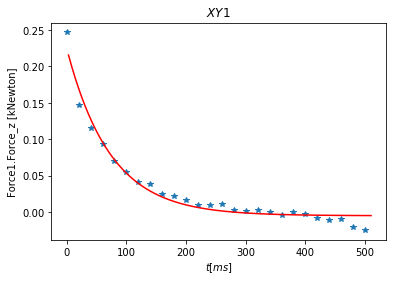

In [376]:
# Plot fitted curve along with data
curvex=np.linspace(3,510,1000)
curvey= exp_fit(curvex, *popt  )
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

plt.xlabel('$t [ms]$')
plt.ylabel('Force1.Force_z [kNewton]')
plt.title('$XY1$ ')

plt.show()